In [42]:
import pandas as pd
import os

In [43]:
dataset_dir = '../dataset'

df_banjir = pd.read_csv(os.path.join(dataset_dir, 'Banjir-2018-2023.csv'))
df_gempa = pd.read_csv(os.path.join(dataset_dir, 'Gempa Bumi-2018-2023.csv'))
df_kebakaran = pd.read_csv(os.path.join(dataset_dir, 'Kebakaran-2018-2023.csv'))
df_kecelakaan = pd.read_csv(os.path.join(dataset_dir, 'Kecelakaan-2018-2023.csv'))

len(df_banjir), len(df_gempa), len(df_kebakaran), len(df_kecelakaan)

(6400, 6039, 7100, 7200)

In [44]:
df_banjir = df_banjir.drop(columns=['description', 'published date', 'url', 'publisher'])
df_gempa = df_gempa.drop(columns=['description', 'published date', 'url', 'publisher'])
df_kebakaran = df_kebakaran.drop(columns=['description', 'published date', 'url', 'publisher'])
df_kecelakaan = df_kecelakaan.drop(columns=['description', 'published date', 'url', 'publisher'])

In [45]:
def get_news_source(title: str):
    # the last part of title after the '-' 
    # contains the news source
    title = title.split('-')[-1].strip().lower()
    return title

def clean_title_from_source_name(title: str):
    # only take the first part of the title
    # before the '-'
    title = title.split('-')[0].strip()
    return title

In [46]:
df_banjir['publisher'] = df_banjir['title'].apply(get_news_source)
df_gempa['publisher'] = df_gempa['title'].apply(get_news_source)
df_kebakaran['publisher'] = df_kebakaran['title'].apply(get_news_source)
df_kecelakaan['publisher'] = df_kecelakaan['title'].apply(get_news_source)

In [47]:
df_banjir['title'] = df_banjir['title'].apply(clean_title_from_source_name)
df_gempa['title'] = df_gempa['title'].apply(clean_title_from_source_name)
df_kebakaran['title'] = df_kebakaran['title'].apply(clean_title_from_source_name)
df_kecelakaan['title'] = df_kecelakaan['title'].apply(clean_title_from_source_name)

In [48]:
# take count of each topic
count_banjir = df_banjir['publisher'].value_counts()
count_gempa = df_gempa['publisher'].value_counts()
count_kebakaran = df_kebakaran['publisher'].value_counts()
count_kecelakaan = df_kecelakaan['publisher'].value_counts()

In [49]:
# combine all counts, take top 10
count_combined = count_banjir.add(count_gempa, fill_value=0).add(count_kebakaran, fill_value=0).add(count_kecelakaan, fill_value=0)
count_combined = count_combined.sort_values(ascending=False)
top10 = count_combined.head(10)
top10

publisher
detiknews         3044.0
kompas.com        2888.0
antara            2105.0
cnn indonesia     1688.0
cnbc indonesia     779.0
liputan6.com       651.0
kumparan.com       635.0
kompas.id          526.0
bisnis.com         472.0
tribunnews.com     380.0
Name: count, dtype: float64

In [50]:
# drop news that are not from the top 10 publisher
top10_list = top10.keys()
df_banjir = df_banjir[df_banjir['publisher'].isin(list(top10_list))].reset_index(drop=True)
df_gempa = df_gempa[df_gempa['publisher'].isin(list(top10_list))].reset_index(drop=True)
df_kebakaran = df_kebakaran[df_kebakaran['publisher'].isin(list(top10_list))].reset_index(drop=True)
df_kecelakaan = df_kecelakaan[df_kecelakaan['publisher'].isin(list(top10_list))].reset_index(drop=True)

In [51]:
len(df_banjir), len(df_gempa), len(df_kebakaran), len(df_kecelakaan)

(3462, 2776, 3494, 3436)

In [52]:
def get_word_count(title: str):
    wc = len(title.split(' '))
    return wc

df_banjir['word_count'] = df_banjir['title'].apply(get_word_count)
df_gempa['word_count'] = df_gempa['title'].apply(get_word_count)
df_kebakaran['word_count'] = df_kebakaran['title'].apply(get_word_count)
df_kecelakaan['word_count'] = df_kecelakaan['title'].apply(get_word_count)

<Axes: ylabel='Frequency'>

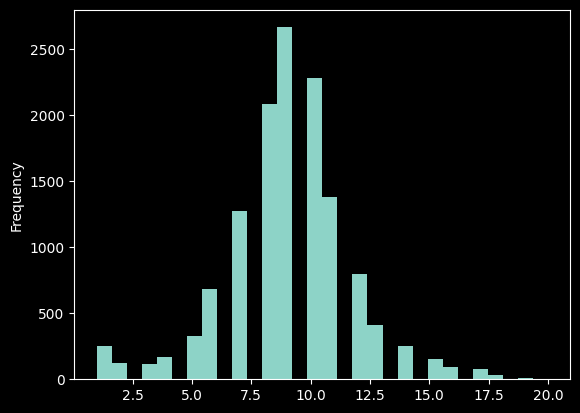

In [54]:
pd.concat([df_banjir, df_gempa, df_kebakaran, df_kecelakaan])['word_count'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

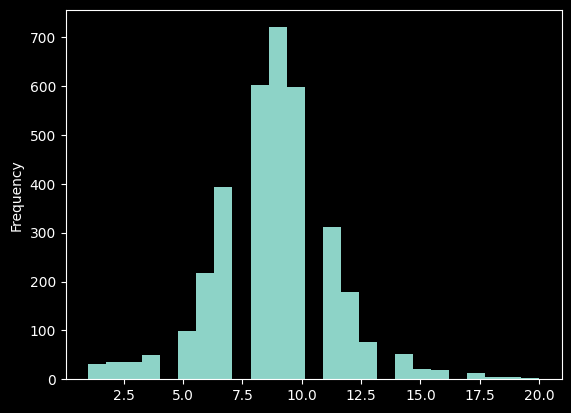

In [30]:
df_banjir['word_count'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

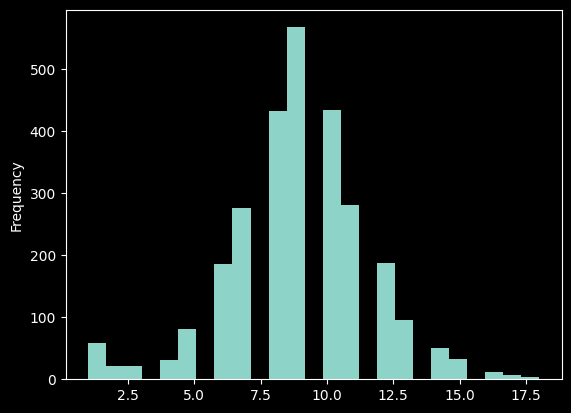

In [31]:
df_gempa['word_count'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

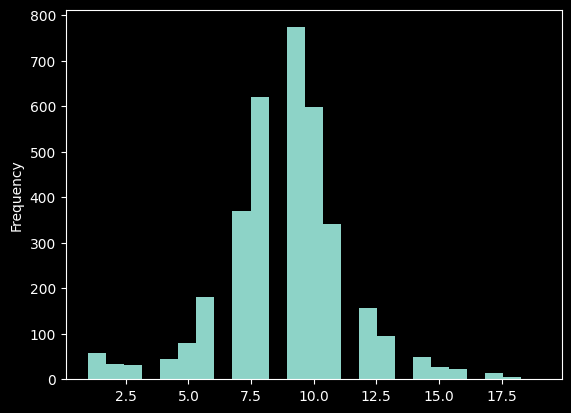

In [32]:
df_kebakaran['word_count'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

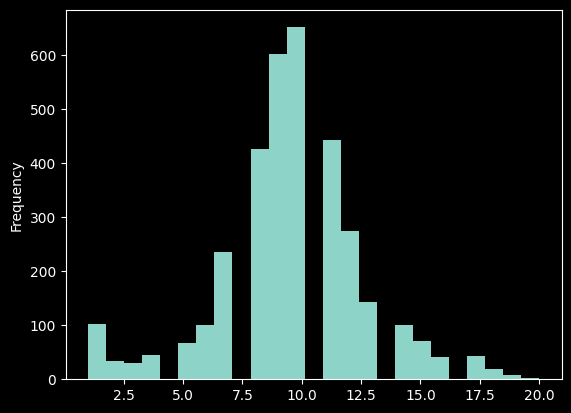

In [33]:
df_kecelakaan['word_count'].plot.hist(bins=25)

In [34]:
df_banjir = df_banjir.drop(index=df_banjir[df_banjir['word_count'] < 7].index)
df_gempa = df_gempa.drop(index=df_gempa[df_gempa['word_count'] < 7].index)
df_kebakaran = df_kebakaran.drop(index=df_kebakaran[df_kebakaran['word_count'] < 7].index)
df_kecelakaan = df_kecelakaan.drop(index=df_kecelakaan[df_kecelakaan['word_count'] < 7].index)

len(df_banjir), len(df_gempa), len(df_kebakaran), len(df_kecelakaan)

(2994, 2377, 3068, 3059)

In [35]:
df_banjir = df_banjir.drop(columns=['word_count', 'publisher'])
df_gempa = df_gempa.drop(columns=['word_count', 'publisher'])
df_kebakaran = df_kebakaran.drop(columns=['word_count', 'publisher'])
df_kecelakaan = df_kecelakaan.drop(columns=['word_count', 'publisher'])

In [36]:
output_dir = 'filtered'
os.makedirs(output_dir, exist_ok=True)

df_banjir.to_csv(os.path.join(output_dir, 'Banjir.csv'), index=False)
df_gempa.to_csv(os.path.join(output_dir, 'Gempa Bumi.csv'), index=False)
df_kebakaran.to_csv(os.path.join(output_dir, 'Kebakaran.csv'), index=False)
df_kecelakaan.to_csv(os.path.join(output_dir, 'Kecelakaan.csv'), index=False)